In [68]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot


df_human= pd.read_csv("../data/results/result_human.csv")


In [69]:
df_final = df_human
for seuil in ["00","03","05","10","20","30","40","50","60","70","80","90"]:
    df_mnli= pd.read_csv(f"../data/results/result_mnli_{seuil}.csv")
    df_final = pd.merge(df_final, df_mnli, on=["task_form"])
    

In [70]:
for seuil in ["0.9999965","0.9999968","0.9999972","0.9999974","0.999996","0.999997"]:
    df_simple= pd.read_csv(f"../data/results/result_simple_{seuil}.csv")
    df_final = pd.merge(df_final, df_simple, on=["task_form"])

In [71]:
df_final.columns

Index(['task_form', 'succes_human', 'succes_mnli_00', 'succes_mnli_03',
       'succes_mnli_05', 'succes_mnli_10', 'succes_mnli_20', 'succes_mnli_30',
       'succes_mnli_40', 'succes_mnli_50', 'succes_mnli_60', 'succes_mnli_70',
       'succes_mnli_80', 'succes_mnli_90', 'succes_simple_0.9999965',
       'succes_simple_0.9999968', 'succes_simple_0.9999972',
       'succes_simple_0.9999974', 'succes_simple_0.999996',
       'succes_simple_0.999997'],
      dtype='object')

In [73]:

df_verite = pd.read_csv("../data/results/conclusion.csv")
df_verite["has_conclusion"]= df_verite.conclusion.apply( lambda x : False if x == "[NVC]" else True)
df_final = pd.merge(df_final, df_verite, on=["task_form"])

In [74]:
df_final.head()

,task_form,succes_human,succes_mnli_00,succes_mnli_03,succes_mnli_05,succes_mnli_10,succes_mnli_20,succes_mnli_30,succes_mnli_40,succes_mnli_50,...,succes_mnli_80,succes_mnli_90,succes_simple_0.9999965,succes_simple_0.9999968,succes_simple_0.9999972,succes_simple_0.9999974,succes_simple_0.999996,succes_simple_0.999997,conclusion,has_conclusion
0,AA1,0.788462,0.884615,0.807692,0.740385,0.663462,0.519231,0.442308,0.365385,0.326923,...,0.182692,0.086538,0.798077,0.653846,0.365385,0.038462,0.817308,0.548077,"[Aac, Iac, Ica]",True
1,AA2,0.696970,0.494949,0.404040,0.373737,0.232323,0.121212,0.060606,0.060606,0.040404,...,0.010101,0.000000,0.454545,0.393939,0.202020,0.010101,0.454545,0.303030,"[Aca, Iac, Ica]",True
2,AA3,0.424242,0.000000,0.111111,0.191919,0.313131,0.555556,0.606061,0.676768,0.717172,...,0.858586,0.898990,0.030303,0.161616,0.565657,0.939394,0.000000,0.272727,[NVC],False
3,AA4,0.306931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.148515,0.148515,0.049505,0.000000,0.148515,0.118812,"[Iac, Ica]",True
4,AE1,0.892157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.990196,0.970588,0.068627,0.068627,0.049020,0.000000,0.068627,0.068627,"[Eac, Eca, Oac, Oca]",True


In [75]:
df_valid = df_final[df_final['has_conclusion'] == True]
df_valid = df_valid.drop(columns=['conclusion', 'has_conclusion'])
df_valid = df_valid.sort_values(by=['succes_human'], ascending=False)

In [76]:
df_valid

,task_form,succes_human,succes_mnli_00,succes_mnli_03,succes_mnli_05,succes_mnli_10,succes_mnli_20,succes_mnli_30,succes_mnli_40,succes_mnli_50,succes_mnli_60,succes_mnli_70,succes_mnli_80,succes_mnli_90,succes_simple_0.9999965,succes_simple_0.9999968,succes_simple_0.9999972,succes_simple_0.9999974,succes_simple_0.999996,succes_simple_0.999997
4,AE1,0.892157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990196,0.970588,0.068627,0.068627,0.049020,0.000000,0.068627,0.068627
17,EA2,0.885714,0.980952,0.980952,0.980952,0.923810,0.723810,0.542857,0.428571,0.342857,0.238095,0.142857,0.095238,0.085714,0.009524,0.009524,0.009524,0.000000,0.009524,0.009524
18,EA3,0.848485,0.939394,0.929293,0.919192,0.737374,0.454545,0.252525,0.202020,0.151515,0.111111,0.080808,0.030303,0.020202,0.020202,0.020202,0.020202,0.000000,0.030303,0.020202
6,AE3,0.808081,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.989899,0.969697,0.969697,0.949495,0.888889,0.696970,0.040404,0.040404,0.040404,0.020202,0.040404,0.040404
9,AI2,0.805825,0.378641,0.378641,0.378641,0.378641,0.339806,0.271845,0.203883,0.106796,0.077670,0.038835,0.019417,0.009709,0.737864,0.699029,0.320388,0.019417,0.737864,0.601942
0,AA1,0.788462,0.884615,0.807692,0.740385,0.663462,0.519231,0.442308,0.365385,0.326923,0.259615,0.240385,0.182692,0.086538,0.798077,0.653846,0.365385,0.038462,0.817308,0.548077
11,AI4,0.772277,0.891089,0.891089,0.881188,0.881188,0.851485,0.801980,0.732673,0.693069,0.613861,0.574257,0.465347,0.316832,0.732673,0.683168,0.376238,0.019802,0.732673,0.594059
32,IA1,0.698925,0.580645,0.580645,0.580645,0.483871,0.290323,0.118280,0.053763,0.021505,0.010753,0.010753,0.010753,0.000000,0.698925,0.677419,0.419355,0.043011,0.698925,0.645161
1,AA2,0.696970,0.494949,0.404040,0.373737,0.232323,0.121212,0.060606,0.060606,0.040404,0.030303,0.010101,0.010101,0.000000,0.454545,0.393939,0.202020,0.010101,0.454545,0.303030
15,AO4,0.604167,0.885417,0.885417,0.885417,0.885417,0.885417,0.864583,0.854167,0.802083,0.739583,0.697917,0.645833,0.531250,0.270833,0.270833,0.125000,0.041667,0.270833,0.229167


In [77]:
df_valid.to_csv("../data/results/result_valid_30_01_22.csv")

In [ ]:
df_unvalid = df_final[df_final['has_conclusion'] == False]
df_unvalid = df_unvalid.drop(columns=['conclusion', 'has_conclusion'])
df_unvalid = df_unvalid.sort_values(by=['succes_human'], ascending=False)
df_unvalid.to_csv("../data/results/result_unvalid_30_01_22.csv")

<AxesSubplot:xlabel='task_form'>

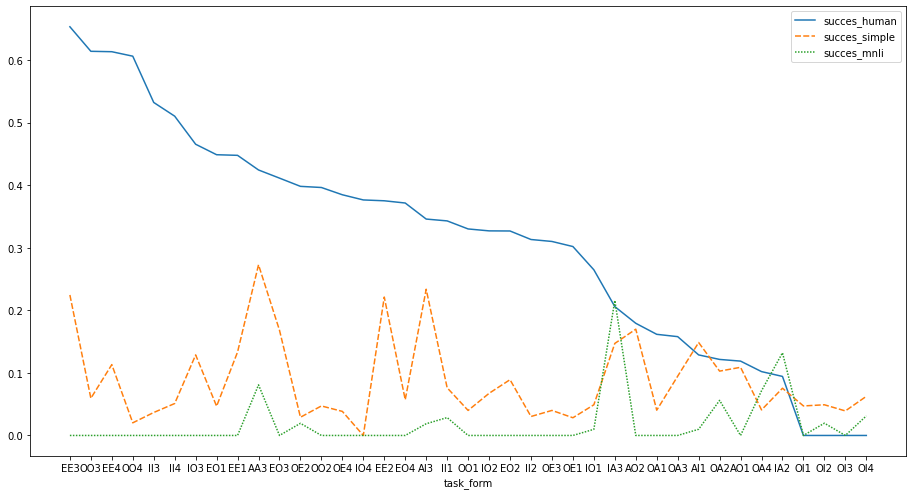

In [47]:

a4_dims = (15.7, 8.27)

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=df_unvalid,ax=ax)